# DSCI 512 Lab 3




### Instructions
rubric={mechanics:3}

Follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).

In [1]:
import altair as alt
from functools import reduce
import networkx as nx
from hashlib import sha1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
autograde_hash = lambda x: sha1(str(x).encode('utf8')).hexdigest()

## Exercise 0: Graphs warm-up

#### 0(a) 
rubric={reasoning:1}

Consider the task of finding a path through a maze like the one shown below. You decide to represent the maze as a graph and then use breadth first search to find a path from the start to the end. When representing the maze as a graph, what would your vertices represent and what would your edges represent?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Maze_simple.svg/220px-Maze_simple.svg.png)

#### 0(b)
rubric={correctness:1}

Consider the tree below (which is also a directed graph). You search the tree starting from the root $R$. Assuming neighbours of a node are ordered alphabetically, in what order will the nodes be visited if you use breadth-first search? 

![](tree.png)

In [3]:
bfs_order = "ABCDEFG"  # TODO

In [5]:
assert autograde_hash(bfs_order) == '7b6d43ec35953f2ca9e92c0b42afead70cabeec7'

#### 0(c)
rubric={correctness:1}

What if you used depth-first search instead?

In [6]:
dfs_order = "ABCDEFG"  # TODO

In [8]:
assert autograde_hash(dfs_order) == '5338bc7583ff4dc29ea48a5e8e796dabff8a19ed'

## Background info for the next few Execises

##### Representing a social network as a graph

A graph or network represents relationships among things. The things are represented as _vertices_ (aka _nodes_), and the relationships are represented as _edges_.

One common use for a graph is to represent travel possibilities, such as on a road map or airline map. The nodes of the graph are cities, and the edges show which cities are directly connected. Then, you can use the graph to plan travel. The graph below represents the social network in Romeo & Juliet.

![](romeo-and-juliet-undirected.png)

An edge between person A and person B means that A considers B a friend, and also B considers A a friend.

This graph is unable to represent certain information. For example, Count Paris wishes to wed Juliet, but she does not reciprocate his affection. To represent this, we would need a _directed graph_. You do not need to worry about this for this assignment; in any case; many social network sites like Facebook do not represent this information either. (Some other social networking sites, such as Twitter, do permit one-way links.)

In the image above, ignore the gray background and the labels for the families ("houses"); those are there just to help you interpret the graph but are not part of the social network itself.

##### Distance

One interesting measure in a social network graph is the "distance" or number of "degrees of separation" between two people. This notion is used in academic research via the [Erdős number](https://en.wikipedia.org/wiki/Erd%C5%91s_number) and in the film industry via the [Bacon number](https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon#Bacon_numbers). For example, in the above graph, the distance between Juliet and Romeo is 1, and the distance between Juliet and Paris is 2 (via Capulet).

##### Representing a graph in Python

We will use the [NetworkX](http://networkx.github.io/) library to represent a graph in Python. We suggest you work through the [NetworkX tutorial](https://networkx.github.io/documentation/stable/tutorial.html), up to and including the "Accessing edges" section - but it is not required. 

## Exercise 1: A small practice graph

rubric={accuracy:1}

It is always a good idea to test your code on a dataset that is small enough for you to manually compute the results. You will create two such datasets for testing.


![](practice_graph.png)

Create the above graph in NetworkX, and store it in a variable named `practice_graph`.

Use the `Graph` class (not `DiGraph`, `MultiGraph`, or `MultiDiGraph`). Review its documentation before you begin.

To help you verify that your graph is correct, the provided code draws the graph. Compare your graph to the figure above. 

/anaconda3/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


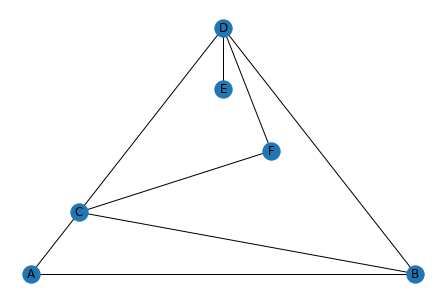

In [3]:
assert len(practice_graph.nodes()) == 6
assert len(practice_graph.edges()) == 8

nx.draw_planar(practice_graph, with_labels=True)

## Exercise 2: The Romeo and Juliet graph

The code below creates a graph named `rj` corresponding to the Romeo and Juliet graph above (ignoring the shaded family/house information).

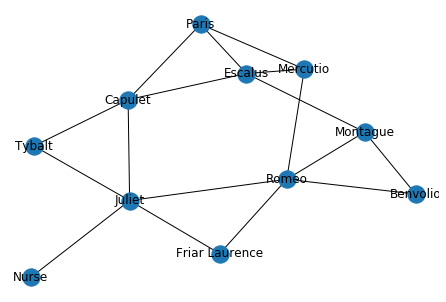

In [11]:
rj = nx.Graph()
rj.add_nodes_from(['Nurse',
                   # House of Capulet
                   'Juliet', 'Tybalt', 'Capulet',

                   'Friar Laurence',

                   # House Montague
                   'Romeo', 'Benvolio', 'Montague',

                   # Ruling house of Verona
                   'Escalus', 'Mercutio', 'Paris'
                   ])

rj.add_edges_from([('Juliet', 'Nurse'),
                   ('Juliet', 'Tybalt'),
                   ('Juliet', 'Capulet'),
                   ('Juliet', 'Friar Laurence'),
                   ('Juliet', 'Romeo'),

                   ('Capulet', 'Tybalt'),
                   ('Capulet', 'Escalus'),
                   ('Capulet', 'Paris'),

                   ('Romeo', 'Friar Laurence'),
                   ('Romeo', 'Benvolio'),
                   ('Romeo', 'Montague'),
                   ('Romeo', 'Mercutio'),

                   ('Montague', 'Benvolio'),
                   ('Montague', 'Escalus'),

                   ('Escalus', 'Mercutio'),
                   ('Escalus', 'Paris'),
                   ('Paris', 'Mercutio')
                   ])
nx.draw(rj, with_labels=True)

#### 2(a)
rubric={accuracy:1,quality:1}

Write a function `highest_degree` that takes in a graph and finds the vertex/vertices with the highest degree - in other words, the person with the largest number of friends. Your function should return a tuple with two elements:

1. The maximum degree (int)
2. All the nodes with that degree (set)

As always, a proper docstring is required.

Note: you can find the degree of a vertex using the following syntax:

In [12]:
nx.degree(rj, "Paris")

3

In [14]:
max_degree, nodes = highest_degree(rj)
assert nodes == {"Romeo", "Juliet"}
assert max_degree == 5

#### 2(b)
rubric={accuracy:2,quality:1}

Write a function `largest_distance` to find the pair(s) of vertices with the largest distance (degree of separation). Your function should return a tuple with two elements:

1. The maximum distance (int)
2. All the pairs of nodes with that distance (set of tuples)

Note: do not include pairs twice. For example, if `('Romeo', 'Juliet')` is in the set, don't also include `('Juliet', 'Romeo')`.

Note: the function [`nx.shortest_path_length`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html#networkx.algorithms.shortest_paths.generic.shortest_path_length) computes the distance (degree of separation) between two nodes.

In [16]:
max_distance, pairs = largest_distance(rj)
assert max_distance == 3
assert len(pairs) == 12

## (optional) Exercise 3: computing degrees of separation with BFS
rubric={accuracy:1}

Write a function `distance_BFS` that takes in a NetworkX `Graph` and two nodes, and uses breadth-first search (BFS) to compute the degrees of separation between the two nodes. What happens if the two nodes are not connected at all?

Note: this will be similar to the BFS code from lecture, except instead of just returning True/False this code will have to keep track of the actual distance (an integer).

Note: when you are done, you can check the code using the tests below and by comparing to `nx.shortest_path_length`, which does the same thing.

In [18]:
assert(distance_BFS(practice_graph, "C", "F")) == 1
assert(distance_BFS(rj, "Nurse", "Paris")) == 3
assert(distance_BFS(rj, "Nurse", "Mercutio")) == 3

In [19]:
practice_graph.add_node("G")

In [20]:
assert(distance_BFS(practice_graph, "A", "G")) == -1

## Exercise 4: Using Facebook data

We will use some Facebook data, which is the file `facebook-links.txt` in the [datasets repository](https://github.ubc.ca/mds-2019-20/datasets). 

The `facebook-links.txt` file is courtesy of the Max Planck Institute for Software Systems. Here is a slightly clarified version of the documentation for this file:

> File `facebook-links.txt` contains a list of all of the user-to-user links from the Facebook New Orleans networks. These links are undirected on Facebook.
>
> Format: Each line contains two numeric user identifiers, meaning the second user appeared in the first user's friend list, and the first user appeared in the second user's friend list. Finally, the third column is a UNIX timestamp with the time of link establishment (if it could be determined, otherwise it is '\N'). Note: a Unix timestamp is the number of seconds since January 1, 1970. You may ignore it in this assignment. 


The code below creates a graph named facebook from the Facebook data in file `facebook-links.txt`. 

In [21]:
facebook_edges = pd.read_csv("facebook-links.txt", sep='\t')
facebook_edges.columns = ["from", "to", "timestamp"]
facebook_edges.head()

,from,to,timestamp
0,1,3,\N
1,1,4,\N
2,1,5,\N
3,1,6,\N
4,1,7,\N


In [22]:
facebook_graph = nx.convert_matrix.from_pandas_edgelist(
    facebook_edges, "from", "to")

In [23]:
assert len(facebook_graph.nodes()) == 63731
assert len(facebook_graph.edges()) == 817090

#### 4(a)
rubric={accuracy:1,viz:1}

Create a histogram of the node degrees in this graph. For example, how many nodes have degree 1, how many nodes have degree 2, etc. Make sure you use enough bins so you can see the general shape of things.

Note: the `networkx` library can get you the [adjacency matrix](https://networkx.github.io/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html) of the graph, which may be useful here. 

Note: you should be learning the necessary Python plotting skills this week in DSCI 531. 

#### 4(b)
rubric={accuracy:1}

To summarize the histogram further, find the mean, median, and mode of the vertex degrees.

Hint: If you haven't already, it is a good idea to create a numpy array containing the degree for each node. Depending on how you computed it, you may get a sparse matrix type or a [numpy matrix](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html) type. You will likely want to convert it into a regular 1-dimensional `numpy.ndarray` before proceeding.

#### 4(c)
rubric={reasoning:1}

Although all nodes in this dataset have at least one friend, the graph is not _connected_; that is, for two nodes $A$ and $B$, there is not necessarily a path from $A$ to $B$. A subset of nodes that are connected is called a _connected component_. We can get the connected components as follows in networkx:

In [30]:
components = nx.connected_components(facebook_graph)

Look at the number of vertices in these connected components, and briefly discuss your results in the context of the social network.

#### (optional) 4(d)
rubric={reasoning:1}

Let's try to find the largest distance between and pair of nodes in the largest connected component of the Facebook graph. Earlier you wrote the `largest_distance` function that computes the largest distance between any pair of nodes. The time complexity of this function is $O(V^2)$ if there are $V$ vertices, which this is going to be too slow for this big graph (you are welcome to try it...). Can you try to approximate/estimate what this largest distance might be? 

Note: there are a lot of ways to approach this question!

In [41]:
connected_components = nx.connected_components(facebook_graph)
fb_largest_cc_nodes = next(connected_components)
fb_largest_cc = facebook_graph.subgraph(fb_largest_cc_nodes).copy()

## Exercise 5: pondering sparse representations

#### 5(a)
rubric={reasoning:1}

What is the space complexity of an adjacency matrix stored as a dense matrix, as a function of the number of vertices $V$ and/or the number of edges $E$? 

#### 5(b)
rubric={reasoning:1}

According to the documentation, NetworkX returns the adjacency matrix as a SciPy sparse matrix. What is the space complexity of this sparse adjacency matrix, as a function of the number of vertices $V$ and/or the number of edges $E$? 

#### 5(c)
rubric={reasoning:1}

The code below measures the storage usage for the adjacency matrix of the Romeo and Juliet data. Are they what you expcted? Note that each stored number typically takes up 8 bytes (64 bits), though on some systems they may only be 4 bytes (32 bits). More in this in DSCI 572.

In [44]:
sparse_matrix = nx.adjacency_matrix(rj)
dense_matrix = sparse_matrix.toarray()

print("Size of sparse matrix:", sparse_matrix.data.nbytes, "bytes")

print("Size of dense  matrix:", dense_matrix.nbytes, "bytes")

Size of sparse matrix: 272 bytes
Size of dense  matrix: 968 bytes


#### 5(d)
rubric={reasoning:1}

How many bytes do you think the dense form of the Facebook adjacency matrix would take, if each element takes 8 bytes? (If you try it, you may well run out of memory).

## (optional) Exercise 6: assessing virality
rubric={reasoning:1}

Everyone wants their video or app to "go viral". This can occur by something spreading through a social network. Here, we will model virality as follows: 

1. pick some virality coefficient $\xi\in (0,1)$
2. select one person (node) at random to be initially "infected"
3. each currently infected person loses interest with probability $\alpha$ and becomes _permanently_ un-infected. By default we'll use $\alpha=0.01$.
4. for each infected person, each neighbour in the graph becomes infected with probability $\xi$. Note: if multiple neighbours of an un-infected node are infected, repeat this step multiple times. For example, if Mercutio and Paris like _Gangnam Style_, then Escalus has two chances of being infected at the current time step. Mathematically, the probability of infection is $1-(1-\xi)^2 = 2\xi-\xi^2$, but you don't need to calculate this in your code because you can just repeatedly try to infect the person.
5. repeat steps 3-4 some number of times, by default $1000$. 

Write a function implementing this model. Your function should return a list/array of the proportion of people infected at each iteration. Using the Facebook data set (or a subgraph if the code is too slow), explore some or all of the following questions:

1. Investigate how the number of infected people proceeds as a function of time: what is the general shape you observe? Is it consistent across runs of the simulation?
2. Report the _maximum_ proportion of your population that was infected at any given time. Try this for a couple values of $\xi$ and investigate how the maximum proportion of infected people depends on $\xi$. Note: For a given value of $\xi$ you will need to run several simulations and average the results to reduce noise. 
3. Do your results depend significantly on the connectivity of the graph? For example, if you randomly remove half of the edges in the Facebook graph (be careful not to delete any vertices in the process!), what is the effect on the virality? 

Note: this model for virality is similar to rudimentary models of how diseases spread across populations. See [here](https://en.wikipedia.org/wiki/Mathematical_modelling_of_infectious_disease#The_SIR_model).

## Exercise 7: generators
rubric={accuracy:1,quality:1}

Write a generator `gen_cumulative_sum` that takes in a list/array of numbers and, at each iteration, yields the cumulative sum of the numbers from the beginning up to that point in the list.

In [56]:
test_nums = [1, 2, 3, 4, 5]

gen = gen_cumulative_sum(test_nums)
assert np.array_equal(list(gen), np.cumsum(test_nums))

In [57]:
gen = gen_cumulative_sum(test_nums)
assert next(gen) == 1
assert next(gen) == 3
assert next(gen) == 6
assert next(gen) == 10
assert next(gen) == 15

In [58]:
next(gen)  # should raise an Exception

StopIteration: 

## Exercise 8: map/reduce
rubric={accuracy:2,quality:1}

Write a function `commonLetters` that takes in a list of strings, converts the strings to lower case and finds all the characters that are present in _all_ the strings. Your function should return the result as a Python `set` of characters. Your function must use Python's `map` and `reduce` functions for the heavy lifting - no loops, recursion, or other trickery! You must also write at least 3 tests for your function, in addition to the test provided.

Some potentially helpful functions:

- You can convert a string `s` to lower case with [`s.lower()`](https://docs.python.org/3/library/stdtypes.html#str.lower).
- You can find the intersection (common elements) between two sets `a` and `b` with [`a.intersection(b)`](https://docs.python.org/3.7/library/stdtypes.html#frozenset.intersection), or `a & b` for short.

In [59]:
# Provided example code
s = "BLAH blah I am sayIng Stuff"
s.lower()

'blah blah i am saying stuff'

In [60]:
set1 = {'a', 'b', 'c', 99}
set2 = {'b', 'c', 'd', 99}
set1.intersection(set2)

{99, 'b', 'c'}

In [62]:
# provided code
assert commonLetters(["abc", "ABC", "AbCdE", "the quick brown fox jumped over the lazy dog",
                      "abraham lincoln", "abracadabra", "chEEs3"]) == {'c'}

Attribution: Exercises 1-4 adapted with permission of the instructor from the University of Washington's CSE 140: https://courses.cs.washington.edu/courses/cse140/13wi/homework/hw4/homework4.html.